## Sentiment Analysis

Import important modules

In [5]:
from textblob import TextBlob as bl
import matplotlib.pyplot as plt
import sys
import os
import json
import string
import re
from nltk.tokenize import sent_tokenize, word_tokenize

Function to clean text

In [6]:
def clean_text(unclean_text):
    'Takes string as input and returns it without punctuation and numbers'
    table_p = str.maketrans(p, len(p) * " ")
    table_d = str.maketrans(d, len(d) * " ")
    text_without_punctuation = unclean_text.translate(table_p)
    text_without_punctuation_numbers = text_without_punctuation.translate(table_d)
    return text_without_punctuation_numbers

Lets do the sentiment analysis now

Enter currency

In [9]:
currency = input('Enter currency (bitcoin/ethereum)')

Enter currency (bitcoin/ethereum)ethereum


The number of words in this file is 207836 and the number of sentences is 10000
Average subjectivity score is: 0.3907932002784385
Average polarity score is: 0.1966865691317937


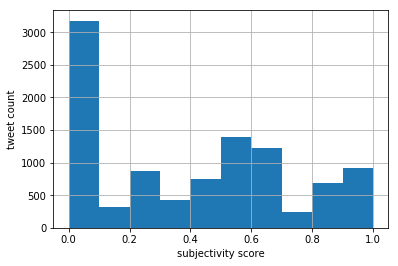

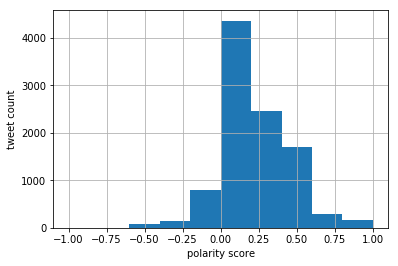

In [8]:
p = string.punctuation
d = string.digits
with open(os.path.join('downloaded_tweets/tweet_stream_{}_10000.json'.format(currency))) as file:
    data = json.load(file)

words = []
sentences = []

excude_punctuation = set(string.punctuation)
exclude_digits = set(string.digits)

for tweet in data:
    tweet_text = tweet['text']
    clean_tweet = clean_text(tweet_text)
    clean_tweet = re.sub(' +', ' ', clean_tweet)
    sentences.append(clean_tweet)
    tweet_words = word_tokenize(clean_tweet)
    words.extend(tweet_words)

print ("The number of words in this file is {} and the number of sentences is {}".format(len(words), len(sentences)))

words_subj = []
words_pol = []

for w in words: #Words
    ws = bl(w)
    words_subj.append(ws.sentiment.subjectivity) #Word Subjectivity list
    words_pol.append(ws.sentiment.polarity) #Word Polarity lists
sentences_subj = []
sentences_pol = []

for s in sentences: #Sentences
    ss = bl(s)
    sentences_subj.append(ss.sentiment.subjectivity) #Sentecne Subjectivity List
    sentences_pol.append(ss.sentiment.polarity) #Sentence Polarity List

subjectivity_avg = sum(sentences_subj)/len(sentences_subj)
polarity_avg = sum(sentences_pol)/len(sentences_pol)
print('Average subjectivity score is: {}'.format(subjectivity_avg))
print('Average polarity score is: {}'.format(polarity_avg))
plt.hist(sentences_subj, bins=10) 
plt.xlabel('subjectivity score')
plt.ylabel('tweet count')
plt.grid(True)
plt.savefig('{} subjectivity.pdf'.format(currency))
plt.show()
plt.hist(sentences_pol, bins=10) 
plt.xlabel('polarity score')
plt.ylabel('tweet count')
plt.grid(True)
plt.savefig('{} polarity.pdf'.format(currency))
plt.show()
